### 라이브러리 설치

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

### 데이터 불러오기

In [13]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [15]:
print ('₩n train shape = ', x_train.shape, ', train label shape =' , y_train.shape)
print ('₩n test shape = ', x_test.shape, ', test label shape =' , y_test.shape)
# train data는 28*28 이미지가 6만개가 있고
# test data는 28*28이미지가 1만개가 있음

₩n train shape =  (60000, 28, 28) , train label shape = (60000,)
₩n test shape =  (10000, 28, 28) , test label shape = (10000,)


In [19]:
print('₩n train label = ', y_train) #학습 데이터 정답 출력
print('₩n test label = ', y_test) #테스트 데이터 정답 출력

₩n train label =  [9 0 0 ... 3 0 5]
₩n test label =  [9 2 1 ... 8 1 5]


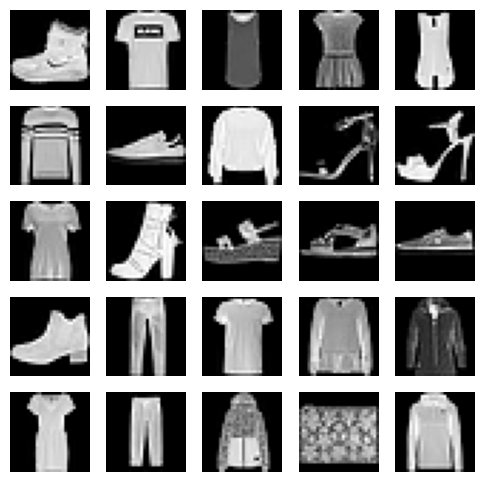

In [23]:
import matplotlib.pyplot as plt
#25개 이미지 출력

plt.figure(figsize=(6,6))
for index in range(25): #25개 이미지 출력
    plt.subplot(5,5, index+1) #5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
plt.show()

### 데이터 전처리 (정규화만 수행, 원핫인코딩 수행하지 않음)

In [ ]:
x_train=(x_train-0)/(255-0)
x_test=(x_test-0)/(255-0)

### 모델 구축 및 컴파일

In [37]:
model=tf.keras.Sequential()

In [41]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28x28크기 2차원 이미지를 784개의 1차원 벡터로 변환
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy', #정답이 원핫인코딩 방식이 아니기 때문에 sparse_categorical_cross
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
hist=model.fit(x_train,y_train,epochs=30,validation_split=0.3)
#traing data로부터 30%비율로 validation data생성 후 overfitting 확인

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.6087 - loss: 9.9345 - val_accuracy: 0.6722 - val_loss: 0.9173
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.6935 - loss: 0.8210 - val_accuracy: 0.7238 - val_loss: 0.7895
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.7432 - loss: 0.6676 - val_accuracy: 0.7587 - val_loss: 0.6710
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - accuracy: 0.7621 - loss: 0.6307 - val_accuracy: 0.7647 - val_loss: 0.6598
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - accuracy: 0.7654 - loss: 0.6153 - val_accuracy: 0.7433 - val_loss: 0.6640
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.7693 - loss: 0.6023 - val_accuracy: 0.7694 - val_loss: 0.6380
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.7772 - loss: 0.5917 - val_accuracy: 0.7541 - val_loss: 0.7002
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.7880 -

### 모델 정확도 평가

In [48]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.8049 - loss: 0.6536


[0.6622712016105652, 0.8058000206947327]

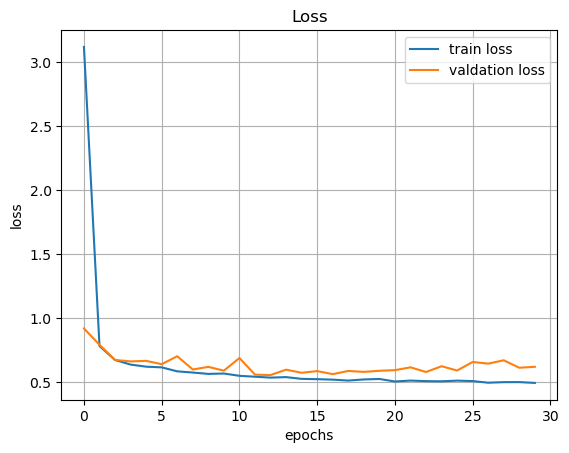

In [52]:
#손실함수
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='valdation loss')

plt.legend(loc='best')
plt.show()

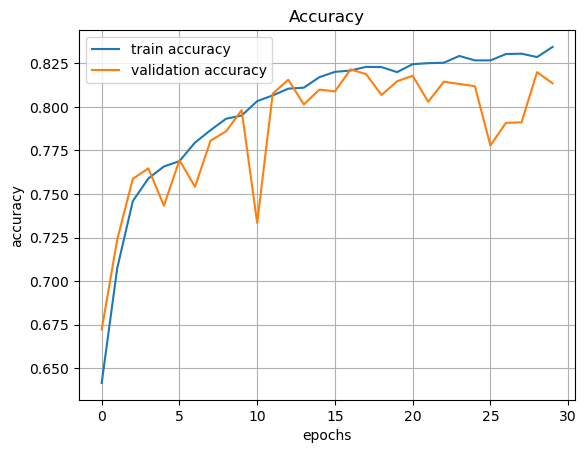

In [54]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


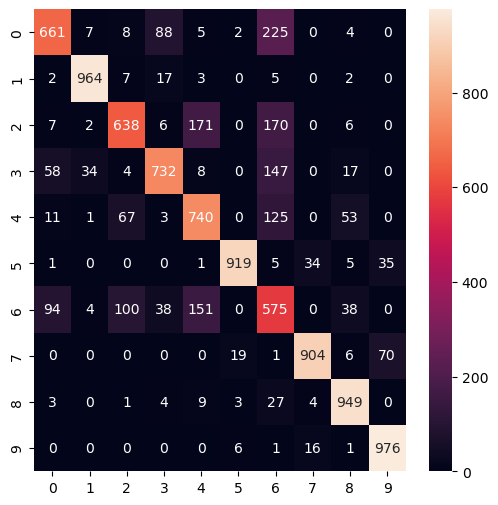

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
predicted_value=model.predict(x_test)
cm=confusion_matrix(t_test,np.argmax(predicted_value,axis=-1)) 
#np.argmax()를 사용하여 가장 높은 확률을 가진 클래스를 선택한다.
#axis=-1은 각 샘플에 대해 마지막(클래스)축을 기준으로 가장 큰 값을 선택하는 것
sns.heatmap(cm,annot=True,fmt='d')
plt.show()